In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dropout, Dense, Input, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle


# Method to load pickle file.
def load_obj(file):
    with open(file, 'rb') as fid:
        return pickle.load(fid)

# Get data.
X = np.load("/home/ubuntu/onekgenomes/data/dimReduc/completePCA/embeddedNum.npy")

# Get labels.
df = pd.read_csv("/home/ubuntu/onekgenomes/data/sampleData/sampleData.tsv", sep='\t')
pops = list(set(df["Population"].tolist()))
pops.sort()
num_classes = len(pops)
targets = np.array([pops.index(pop) for pop in df["Population"].tolist()])
y = to_categorical(targets)

# Train-validation-test split (60-20-20).
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=0
)

# Normalize inputs.
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_val, X_test = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

In [ ]:

#temp_ = X_train - np.mean(X_train, axis=0)
#temp = temp_ / np.std(X_train, axis=0)
#np.max(np.abs(temp - scaler.transform(X_train)))

temp = np.mean(scaler.transform(X_val), axis=0)
np.max(np.abs(temp))

In [ ]:

"""
# Model parameters for normalized input.
p = {
    "dropout_input": 0.15,
    "dropout_hidden": 0.25,
    "reg": 1.0, #1.0,
    "lr": 10 ** -3,
    "epochs": 100
}
"""

"""
# Model parameters without normalizing input.
p = {
    "dropout_input": 0.25,
    "dropout_hidden": 0.5,
    "reg": 1.0, #1.0,
    "lr": 10 ** -3,
    "epochs": 100
}
"""


"""
# Define model with batch normalization.
model = keras.Sequential([
    Dropout(p["dropout_input"]),
    Dense(2400, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(600, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(100, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(26, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('softmax')
])
"""


# Model parameters without batch normalization.
p = {
    "dropout_input": 0.10,
    "dropout_hidden": 0.23,
    "reg": 0.03, #1.0,
    "lr": 0.0005,
    "epochs": 100
}
# Define model without batch normalization.
model = keras.Sequential([
    Dropout(p["dropout_input"]),
    Dense(2400, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),
    Dense(600, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),
    Dense(100, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),        
    Dense(26, kernel_regularizer=l2(p["reg"]), activation=tf.nn.softmax)
])

num_train = X_train.shape[0]
optimizer = Adam(lr=p["lr"])
model.compile(optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'])
out = model.fit(
    X_train,
    y_train,
    validation_data=[X_val, y_val],
    batch_size=num_train,    # Batch gradient descent.
    epochs=p['epochs']
)

In [29]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dropout, Dense, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle


# Method to load pickle file.
def load_obj(file):
    with open(file, 'rb') as fid:
        return pickle.load(fid)

# Get data.
X = np.load("/home/ubuntu/onekgenomes/data/dimReduc/completePCA/embeddedNum.npy")

# Get labels.
df = pd.read_csv("/home/ubuntu/onekgenomes/data/sampleData/sampleData.tsv", sep='\t')
pops = list(set(df["Population"].tolist()))
pops.sort()
num_classes = len(pops)
targets = np.array([pops.index(pop) for pop in df["Population"].tolist()])
y = to_categorical(targets)

# Train-validation-test split (60-20-20).
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=0
)


"""# Normalize inputs.
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_val, X_test = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)
"""

"""# First parameter search space.
p = {
    "dropout_input": list(np.linspace(0, 0.23333333, 8)),
    "dropout_hidden": list(np.linspace(0, 0.5, 16)),
    "reg": list(10 ** np.linspace(-4,3,22)),
    "lr": list(10 ** np.linspace(-3,-5, 7)),
    "epochs": [100]
}
"""

# Second parameter search space.
p = {
    "dropout_input": 0.25,
    "dropout_hidden": 0.5,
    "reg": 0.1,
    "lr": 0.001,
    "epochs": 200
}


# Define model without batch norm.
model_wo_bn = keras.Sequential([
    Dropout(p["dropout_input"]),
    Dense(2400, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),
    Dense(600, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),
    Dense(100, kernel_regularizer=l2(p["reg"]), activation=tf.nn.relu),
    Dropout(p["dropout_hidden"]),        
    Dense(26, kernel_regularizer=l2(p["reg"]), activation=tf.nn.softmax)
])


# Define model with batch normal.
model_bn = keras.Sequential([
    Dropout(p["dropout_input"]),
    Dense(2400, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(600, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(100, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(p["dropout_hidden"]),
    Dense(26, kernel_regularizer=l2(p["reg"])),
    BatchNormalization(),
    Activation('softmax')
])

model = model_wo_bn
num_train = X_train.shape[0]
optimizer = Adam(lr=p["lr"])
model.compile(optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'])
out = model.fit(
    X_train,
    y_train,
    validation_data=[X_val, y_val],
    batch_size=num_train,    # Batch gradient descent.
    epochs=p["epochs"]
)


Train on 1502 samples, validate on 501 samples
Epoch 1/200
1502/1502 [==============================] - 3s 2ms/step - loss: 377.7354 - acc: 0.0340 - val_loss: 364.7975 - val_acc: 0.0399
Epoch 2/200
1502/1502 [==============================] - 1s 338us/step - loss: 365.3784 - acc: 0.0306 - val_loss: 350.7484 - val_acc: 0.0439
Epoch 3/200
1502/1502 [==============================] - 0s 332us/step - loss: 351.1277 - acc: 0.0333 - val_loss: 336.6180 - val_acc: 0.0519
Epoch 4/200
1502/1502 [==============================] - 0s 329us/step - loss: 336.9446 - acc: 0.0526 - val_loss: 322.7962 - val_acc: 0.0559
Epoch 5/200
1502/1502 [==============================] - 1s 336us/step - loss: 323.1649 - acc: 0.0499 - val_loss: 309.4203 - val_acc: 0.0499
Epoch 6/200
1502/1502 [==============================] - 0s 333us/step - loss: 309.5287 - acc: 0.0466 - val_loss: 296.2371 - val_acc: 0.0379
Epoch 7/200
1502/1502 [==============================] - 0s 332us/step - loss: 296.1549 - acc: 0.0513 - val_l

Epoch 59/200
1502/1502 [==============================] - 0s 331us/step - loss: 21.2309 - acc: 0.2537 - val_loss: 20.1088 - val_acc: 0.3114
Epoch 60/200
1502/1502 [==============================] - 0s 331us/step - loss: 20.2692 - acc: 0.2696 - val_loss: 19.2564 - val_acc: 0.2834
Epoch 61/200
1502/1502 [==============================] - 1s 340us/step - loss: 19.4383 - acc: 0.2703 - val_loss: 18.4227 - val_acc: 0.2954
Epoch 62/200
1502/1502 [==============================] - 1s 334us/step - loss: 18.5866 - acc: 0.2956 - val_loss: 17.6250 - val_acc: 0.2675
Epoch 63/200
1502/1502 [==============================] - 1s 333us/step - loss: 17.7458 - acc: 0.3069 - val_loss: 16.8638 - val_acc: 0.2655
Epoch 64/200
1502/1502 [==============================] - 1s 337us/step - loss: 17.0083 - acc: 0.3296 - val_loss: 16.1364 - val_acc: 0.2635
Epoch 65/200
1502/1502 [==============================] - 1s 334us/step - loss: 16.3008 - acc: 0.3622 - val_loss: 15.4625 - val_acc: 0.2735
Epoch 66/200
1502/15

Epoch 118/200
1502/1502 [==============================] - 0s 331us/step - loss: 4.3612 - acc: 0.9248 - val_loss: 4.9829 - val_acc: 0.7745
Epoch 119/200
1502/1502 [==============================] - 0s 331us/step - loss: 4.2953 - acc: 0.9341 - val_loss: 4.9430 - val_acc: 0.7725
Epoch 120/200
1502/1502 [==============================] - 1s 334us/step - loss: 4.2184 - acc: 0.9348 - val_loss: 4.9036 - val_acc: 0.7784
Epoch 121/200
1502/1502 [==============================] - 0s 330us/step - loss: 4.1588 - acc: 0.9434 - val_loss: 4.8560 - val_acc: 0.7725
Epoch 122/200
1502/1502 [==============================] - 0s 331us/step - loss: 4.0920 - acc: 0.9361 - val_loss: 4.8005 - val_acc: 0.7784
Epoch 123/200
1502/1502 [==============================] - 0s 331us/step - loss: 4.0600 - acc: 0.9414 - val_loss: 4.7467 - val_acc: 0.7844
Epoch 124/200
1502/1502 [==============================] - 0s 330us/step - loss: 4.0081 - acc: 0.9387 - val_loss: 4.6956 - val_acc: 0.7864
Epoch 125/200
1502/1502 [==

Epoch 177/200
1502/1502 [==============================] - 0s 328us/step - loss: 2.6249 - acc: 0.9567 - val_loss: 3.5099 - val_acc: 0.7784
Epoch 178/200
1502/1502 [==============================] - 1s 334us/step - loss: 2.6101 - acc: 0.9634 - val_loss: 3.4994 - val_acc: 0.7764
Epoch 179/200
1502/1502 [==============================] - 0s 330us/step - loss: 2.6057 - acc: 0.9534 - val_loss: 3.4869 - val_acc: 0.7665
Epoch 180/200
1502/1502 [==============================] - 0s 331us/step - loss: 2.5710 - acc: 0.9587 - val_loss: 3.4715 - val_acc: 0.7745
Epoch 181/200
1502/1502 [==============================] - 0s 331us/step - loss: 2.5623 - acc: 0.9694 - val_loss: 3.4560 - val_acc: 0.7804
Epoch 182/200
1502/1502 [==============================] - 0s 332us/step - loss: 2.5419 - acc: 0.9660 - val_loss: 3.4416 - val_acc: 0.7964
Epoch 183/200
1502/1502 [==============================] - 0s 332us/step - loss: 2.5347 - acc: 0.9654 - val_loss: 3.4266 - val_acc: 0.7844
Epoch 184/200
1502/1502 [==

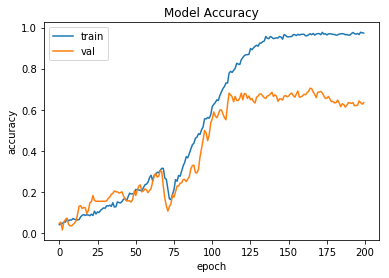

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(out.history['acc'])
plt.plot(out.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

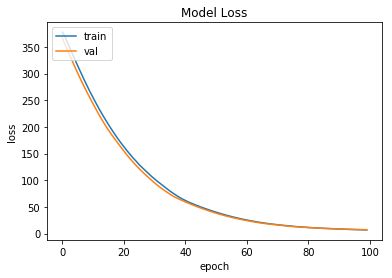

In [10]:
# summarize history for loss
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_val, y_val)